<a href="https://colab.research.google.com/github/vpatil2209/Netflix-/blob/master/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [45]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX (1).csv


In [46]:
# Store the dataset in a dataframe
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [47]:
# Get the no of trading days
df.shape

(1007, 7)

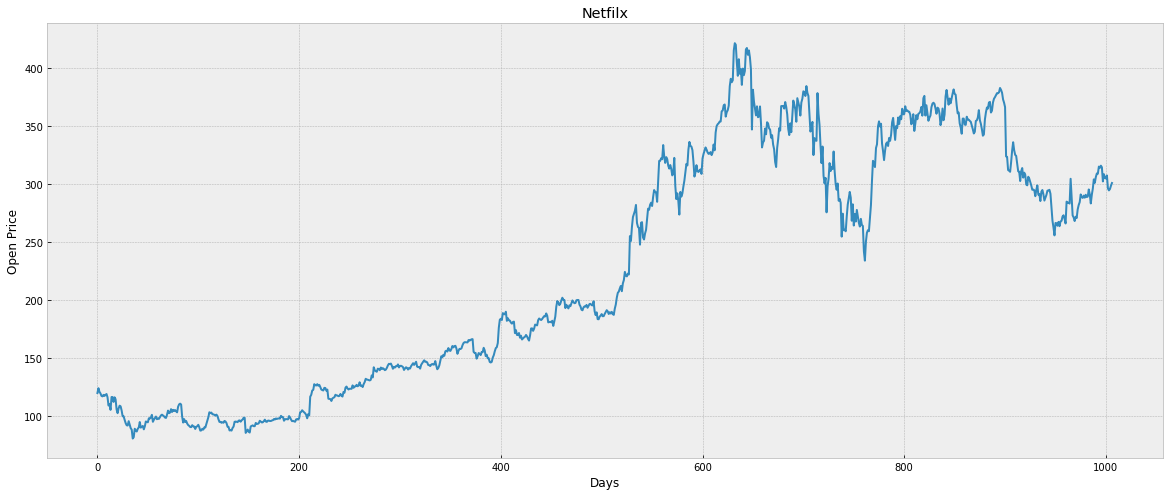

In [48]:
# Visualize the open price
plt.figure(figsize=(20, 8))
plt.title('Netfilx')
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.plot(df['Open'])
plt.show()

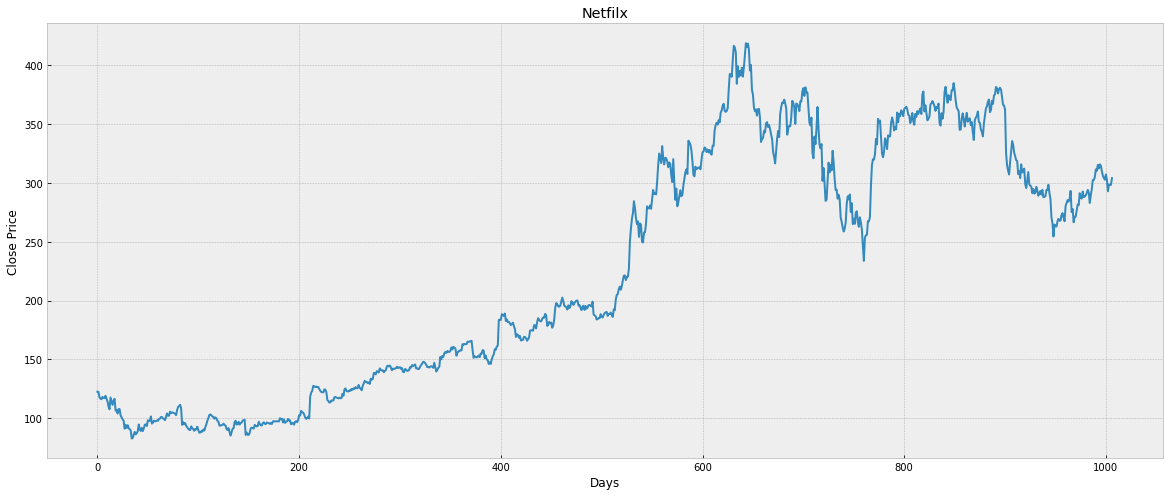

In [49]:
# Visualize the close price
plt.figure(figsize=(20, 8))
plt.title('Netfilx')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [50]:
# Creating df for only close price
df = df[['Close']]
df.head()

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998


In [51]:
# Predicting the future value
days = 25
df['Prediction'] = df[['Close']].shift(-days)
df.head()

,Close,Prediction
0,122.639999,99.120003
1,122.510002,97.830002
2,118.019997,91.150002
3,116.629997,94.410004
4,116.239998,91.839996


In [52]:
# Create a feature dataset and delete x rows
X = np.array(df.drop(['Prediction'], 1))[:-days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [53]:
# Target dataset convert to y and creatiing  numpy array
y = np.array(df['Prediction'])[:-days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [55]:
# Models
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear = LinearRegression().fit(x_train, y_train)

In [56]:
x_days = df.drop(['Prediction'], 1)[: -days]
x_days = x_days.tail(days)
x_days = np.array(x_days)
print(x_days)

[[274.459991]
 [270.720001]
 [267.529999]
 [280.480011]
 [282.929993]
 [285.529999]
 [284.25    ]
 [286.279999]
 [293.350006]
 [275.299988]
 [278.049988]
 [266.690002]
 [271.269989]
 [271.5     ]
 [276.820007]
 [281.859985]
 [281.209991]
 [291.450012]
 [287.410004]
 [286.809998]
 [292.859985]
 [288.029999]
 [288.589996]
 [289.570007]
 [291.570007]]


In [57]:
# Decision tree prediction
print('Decision Regressor Prediction')
tree_predict = tree.predict(x_days)
print(tree_predict)

# Linear Regression
print('Linear Regression Prediction')
linear_predict = linear.predict(x_days)
print(linear_predict)

Decision Regressor Prediction
[294.179993 276.820007 283.109985 326.26001  332.940002 302.570007
 302.600006 305.160004 311.690002 315.       295.350006 312.48999
 347.570007 314.660004 295.350006 306.160004 306.160004 267.619995
 307.350006 302.5      293.119995 298.929993 298.440002 298.5
 271.269989]
Linear Regression Prediction
[277.36691598 273.78631894 270.73227021 283.13037144 285.47593875
 287.96513626 286.73968896 288.68317234 295.45186587 278.17111352
 280.8039125  269.92807267 274.31286725 274.53307551 279.62635151
 284.45153294 283.82924075 293.63284687 289.76501816 289.19058355
 294.98272886 290.35858987 290.89472061 291.83296496 293.74772786]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


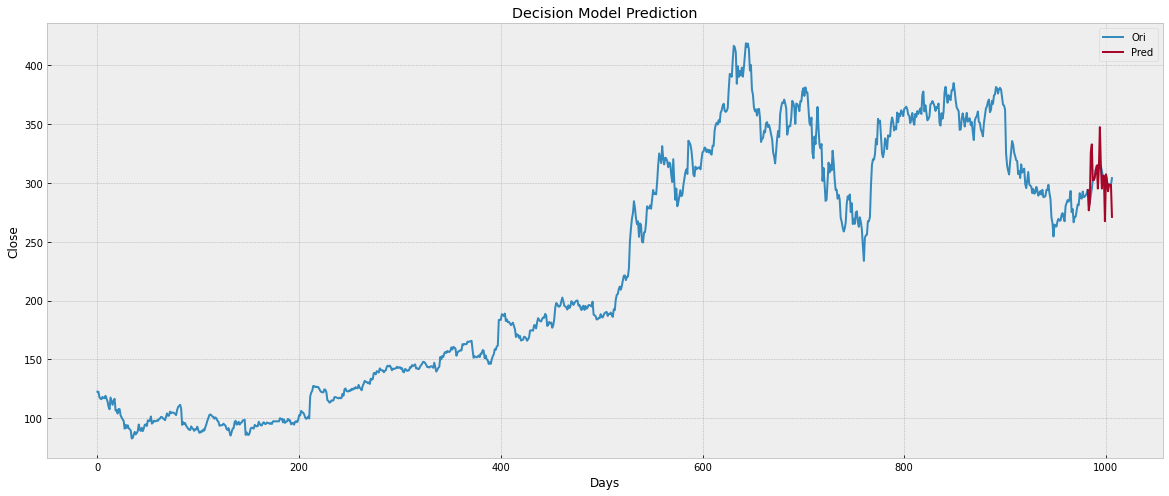

In [59]:
# Visualizing the data models
prediction = tree_predict
df1 = df[X.shape[0]:]
df1['Pred'] = prediction
plt.figure(figsize=(20, 8))
plt.title('Decision Model Prediction')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(df1['Pred'])
plt.legend(['Ori', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


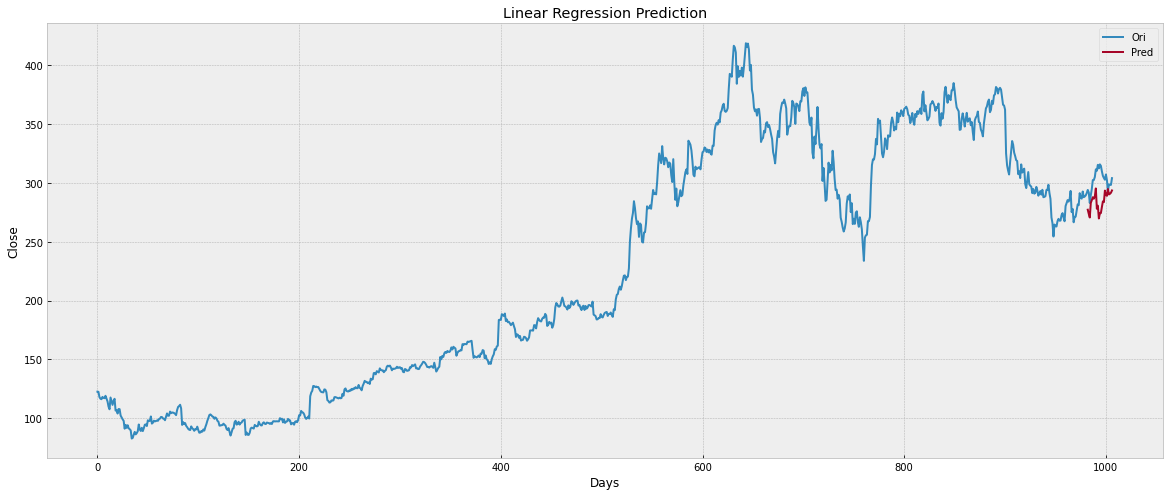

In [61]:
# Visualizing the data models
prediction = linear_predict
df1 = df[X.shape[0]:]
df1['Pred'] = prediction
plt.figure(figsize=(20, 8))
plt.title('Linear Regression Prediction')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(df1['Pred'])
plt.legend(['Ori', 'Pred'])
plt.show()